ML project on AI jobs data set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ai_job_dataset.csv')

In [ ]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,18-10-2024,07-11-2024,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,20-11-2024,11-01-2025,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,18-03-2025,07-04-2025,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,23-12-2024,24-02-2025,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,15-04-2025,23-06-2025,1989,6.6,Advanced Robotics


In [ ]:
print(df.shape)

(15000, 19)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [ ]:
df.isnull().sum()

,0
job_id,0
job_title,0
salary_usd,0
salary_currency,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
remote_ratio,0


In [ ]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [ ]:
df.dtypes

,0
job_id,object
job_title,object
salary_usd,int64
salary_currency,object
experience_level,object
employment_type,object
company_location,object
company_size,object
employee_residence,object
remote_ratio,int64


### STEP 2: Data Cleaning and Feature preparation

In [ ]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,18-10-2024,07-11-2024,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,20-11-2024,11-01-2025,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,18-03-2025,07-04-2025,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,23-12-2024,24-02-2025,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,15-04-2025,23-06-2025,1989,6.6,Advanced Robotics


In [ ]:
# Converting date columns to datetime format

df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'],format='mixed')

/tmp/ipython-input-326480964.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['posting_date'] = pd.to_datetime(df['posting_date'])


In [ ]:
df.dtypes

,0
job_id,object
job_title,object
salary_usd,int64
salary_currency,object
experience_level,object
employment_type,object
company_location,object
company_size,object
employee_residence,object
remote_ratio,int64


In [ ]:
#Normalizing text columns

categorical_cols = ['job_title','salary_currency','experience_level','employment_type','company_location','company_size','employee_residence','education_required','industry','company_name']

for col in categorical_cols:
  df[col] = df[col].str.strip().str.lower()

In [ ]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,ai research scientist,90376,usd,se,ct,china,m,china,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",bachelor,9,automotive,2024-10-18,2024-07-11,1076,5.9,smart analytics
1,AI00002,ai software engineer,61895,usd,en,ct,canada,m,ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",master,1,media,2024-11-20,2025-11-01,1268,5.2,techcorp inc
2,AI00003,ai specialist,152626,usd,mi,fl,switzerland,l,south korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",associate,2,education,2025-03-18,2025-07-04,1974,9.4,autonomous tech
3,AI00004,nlp engineer,80215,usd,se,fl,india,m,india,50,"Scala, SQL, Linux, Python",phd,7,consulting,2024-12-23,2025-02-24,1345,8.6,future systems
4,AI00005,ai consultant,54624,eur,en,pt,france,s,singapore,100,"MLOps, Java, Tableau, Python",master,0,media,2025-04-15,2025-06-23,1989,6.6,advanced robotics


In [ ]:
# finding unique values in the categorical columns

In [ ]:
print("Unique values in 'experience_level':", df['experience_level'].unique())
print("Unique values in 'employment_type':", df['employment_type'].unique())
print("Unique values in 'company_size':", df['company_size'].unique())
print("Unique values in 'job_title':", df['job_title'].unique())
print("Unique values in 'remote_ratio':", df['remote_ratio'].unique())

Unique values in 'experience_level': ['se' 'en' 'mi' 'ex']
Unique values in 'employment_type': ['ct' 'fl' 'pt' 'ft']
Unique values in 'company_size': ['m' 'l' 's']
Unique values in 'job_title': ['ai research scientist' 'ai software engineer' 'ai specialist'
 'nlp engineer' 'ai consultant' 'ai architect' 'principal data scientist'
 'data analyst' 'autonomous systems engineer' 'ai product manager'
 'machine learning engineer' 'data engineer' 'research scientist'
 'ml ops engineer' 'robotics engineer' 'head of ai'
 'deep learning engineer' 'data scientist' 'machine learning researcher'
 'computer vision engineer']
Unique values in 'remote_ratio': [ 50 100   0]


In [ ]:
print("count of Unique values in 'experience_level':", df['experience_level'].value_counts())
print("count of Unique values in 'employment_type':", df['employment_type'].value_counts())
print("count of Unique values in 'company_size':", df['company_size'].value_counts())
print("count of Unique values in 'job_title':", df['job_title'].value_counts())
print("count of Unique values in 'remote_ratio':", df['remote_ratio'].value_counts())

count of Unique values in 'experience_level': experience_level
mi    3781
ex    3760
se    3741
en    3718
Name: count, dtype: int64
count of Unique values in 'employment_type': employment_type
ft    3812
fl    3758
ct    3721
pt    3709
Name: count, dtype: int64
count of Unique values in 'company_size': company_size
s    5007
l    4998
m    4995
Name: count, dtype: int64
count of Unique values in 'job_title': job_title
machine learning researcher    808
ai software engineer           784
autonomous systems engineer    777
machine learning engineer      772
ai architect                   771
head of ai                     765
nlp engineer                   762
robotics engineer              759
data analyst                   759
ai research scientist          756
data engineer                  749
ai product manager             743
research scientist             742
principal data scientist       734
ai specialist                  728
ml ops engineer                725
computer vision 

### Step 3 : EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,ai research scientist,90376,usd,se,ct,china,m,china,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",bachelor,9,automotive,2024-10-18,2024-07-11,1076,5.9,smart analytics
1,AI00002,ai software engineer,61895,usd,en,ct,canada,m,ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",master,1,media,2024-11-20,2025-11-01,1268,5.2,techcorp inc
2,AI00003,ai specialist,152626,usd,mi,fl,switzerland,l,south korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",associate,2,education,2025-03-18,2025-07-04,1974,9.4,autonomous tech
3,AI00004,nlp engineer,80215,usd,se,fl,india,m,india,50,"Scala, SQL, Linux, Python",phd,7,consulting,2024-12-23,2025-02-24,1345,8.6,future systems
4,AI00005,ai consultant,54624,eur,en,pt,france,s,singapore,100,"MLOps, Java, Tableau, Python",master,0,media,2025-04-15,2025-06-23,1989,6.6,advanced robotics


In [ ]:
df.describe()

,salary_usd,remote_ratio,years_experience,posting_date,application_deadline,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000,15000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,2024-08-29 08:48:51.840000,2024-10-19 07:58:22.080000256,1503.314733,7.504273
min,32519.000000,0.000000,0.000000,2024-01-01 00:00:00,2024-01-02 00:00:00,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,2024-04-29 00:00:00,2024-06-03 00:00:00,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,2024-08-28 00:00:00,2024-10-09 00:00:00,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2024-12-29 00:00:00,2025-02-24 00:00:00,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2025-04-30 00:00:00,2025-12-06 00:00:00,2499.000000,10.000000
std,60260.940438,40.812712,5.545768,NaN,NaN,576.127083,1.450870


In [ ]:
df1 = df[df['salary_usd']<280000].reset_index(drop=True)

In [ ]:
df1.to_csv('cleaned aijobdataset.csv')

In [ ]:
df.head(1)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,ai research scientist,90376,usd,se,ct,china,m,china,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",bachelor,9,automotive,2024-10-18,2024-07-11,1076,5.9,smart analytics


In [ ]:
df[['job_title','experience_level','employment_type','company_location','company_size','education_required','industry']].value_counts()

job_title                    experience_level  employment_type  company_location  company_size  education_required  industry      
head of ai                   en                fl               ireland           m             bachelor            automotive        2
robotics engineer            se                fl               israel            m             phd                 consulting        2
ml ops engineer              se                ct               china             m             master              retail            2
data scientist               en                pt               netherlands       s             master              media             2
ai specialist                se                fl               singapore         s             phd                 manufacturing     2
                                                                                                                                     ..
autonomous systems engineer  mi                pt               china             l             associate           education         1
                                                                                  s             master              government        1
                                                                finland           l             phd                 transportation    1
                                                                                  s             bachelor            technology        1
                                               ft               united states     l             associate           retail            1
Name: count, Length: 14899, dtype: int64

In [ ]:
df[['industry','experience_level','employment_type',]].value_counts()

,,,count
industry,experience_level,employment_type,
gaming,en,ct,84
media,ex,ct,80
technology,se,ft,80
telecommunications,ex,ft,79
media,mi,fl,79
...,...,...,...
manufacturing,mi,pt,46
automotive,ex,ft,45
retail,ex,fl,44


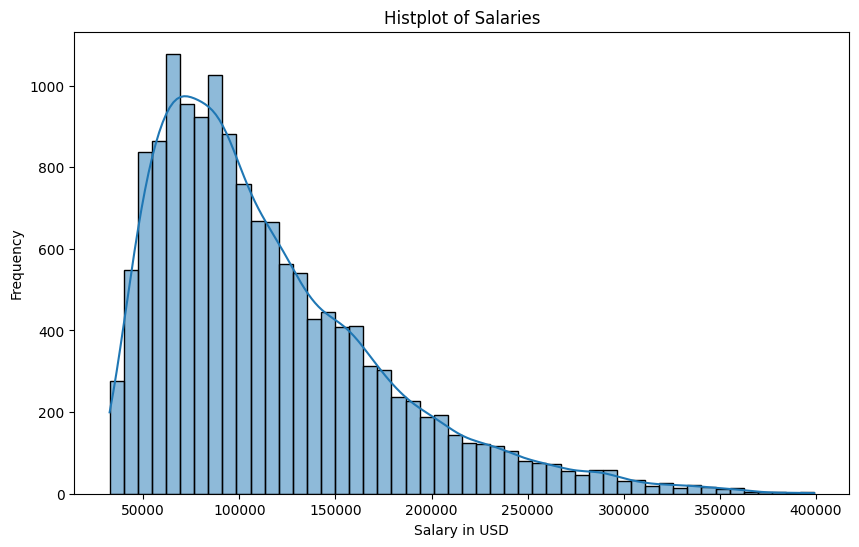

In [ ]:
### Plot for the Salary

plt.figure(figsize=(10,6))
sns.histplot(df['salary_usd'],bins=50,kde=True)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Histplot of Salaries')
plt.show()

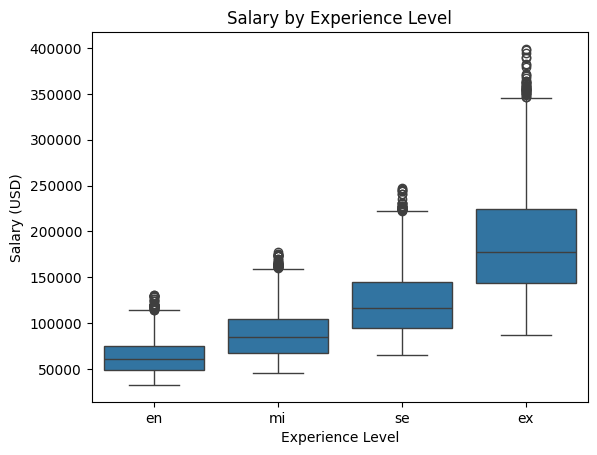

In [ ]:
plt.figure()
sns.boxplot(x='experience_level', y='salary_usd', data=df, order=['en', 'mi', 'se', 'ex'])
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()

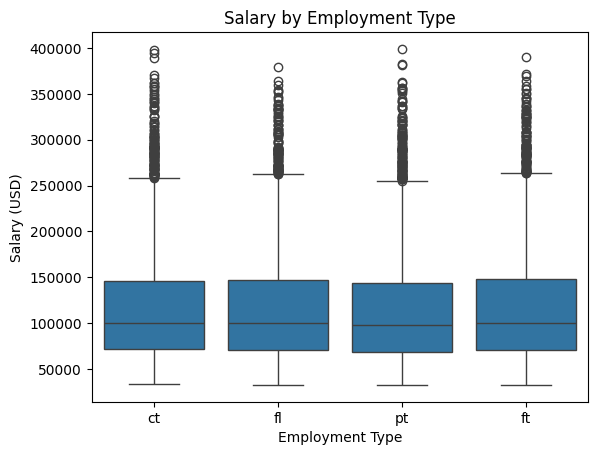

In [ ]:
plt.figure()
sns.boxplot(x='employment_type', y='salary_usd', data=df)
plt.title("Salary by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Salary (USD)")
plt.show()

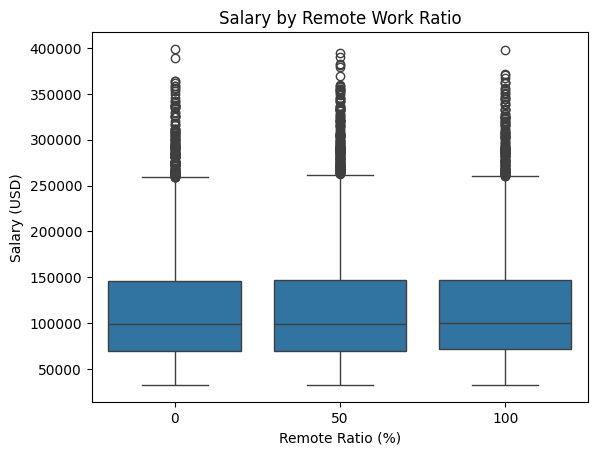

In [ ]:
plt.figure()
sns.boxplot(x='remote_ratio', y='salary_usd', data=df)
plt.title("Salary by Remote Work Ratio")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary (USD)")
plt.show()

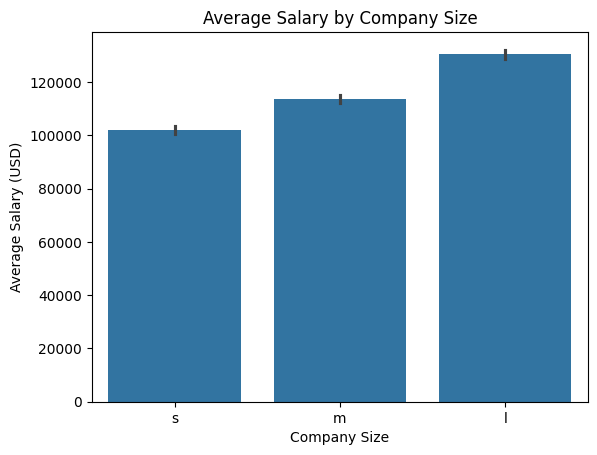

In [ ]:
plt.figure()
sns.barplot(x='company_size', y='salary_usd', data=df, estimator=np.mean, order=['s', 'm', 'l'])
plt.title("Average Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Average Salary (USD)")
plt.show()

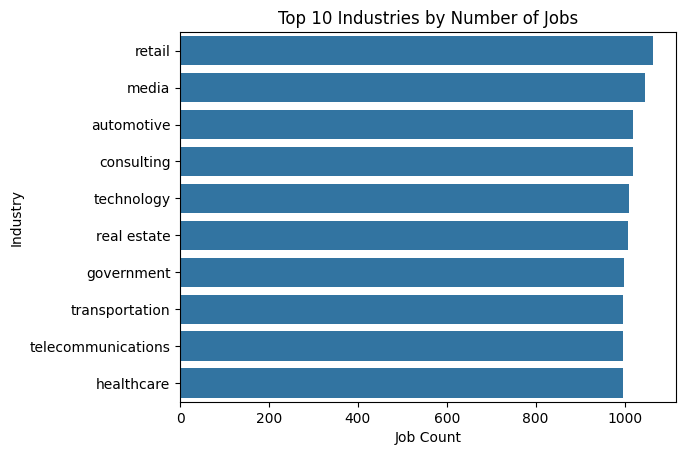

In [ ]:
plt.figure()
top_industries = df['industry'].value_counts().head(10) #since the no of unique values are only 15
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title("Top 10 Industries by Number of Jobs")
plt.xlabel("Job Count")
plt.ylabel("Industry")
plt.show()

In [ ]:
## Feature engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_model = df.copy()

In [ ]:
df_model.drop(['job_id','posting_date','application_deadline'],axis=1, inplace=True)

In [ ]:
df_model.head()

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,job_description_length,benefits_score,company_name
0,ai research scientist,90376,usd,se,ct,china,m,china,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",bachelor,9,automotive,1076,5.9,smart analytics
1,ai software engineer,61895,usd,en,ct,canada,m,ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",master,1,media,1268,5.2,techcorp inc
2,ai specialist,152626,usd,mi,fl,switzerland,l,south korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",associate,2,education,1974,9.4,autonomous tech
3,nlp engineer,80215,usd,se,fl,india,m,india,50,"Scala, SQL, Linux, Python",phd,7,consulting,1345,8.6,future systems
4,ai consultant,54624,eur,en,pt,france,s,singapore,100,"MLOps, Java, Tableau, Python",master,0,media,1989,6.6,advanced robotics
